# Regressão Linear Simples
$$ Y  = \beta_0 + \beta_1 \cdot X + \epsilon$$
Onde $Y$ é a variável resposta, $X$ é o preditor e $\epsilon$ é o erro associado. $\epsilon$ pode ser por exemplo fatores que são relevantes mas não são partes do modelo escolhido. 
Assumimos $ϵ \sim N(0, \sigma^2)$, ou seja, a média é nula e a variância $\sigma^2$, logo $ϵ$ pode ser escrito como 
$$ϵ = | \hat{y_i} - y_i |$$
onde $\hat{y}$ é o valor esperado.

## Estimando os coeficientes $\beta_0$ e $\beta_1$
$$ Y = \beta_0 + \beta_1 \cdot X + ϵ$$
Calculamos a esperança da equação afim de estimar o valor de $\beta_0$.
$$ E[Y] = E[\beta_0 + \beta_1 \cdot X + ϵ] = E[\beta_0] + E[\beta_1 \cdot X]+ E[ϵ]$$
$$E[ϵ] = 0$$
$$ E[Y] = \beta_0 + \beta_1 \cdot E[X]$$

$$ \beta_0 = E[Y] - \beta_1 \cdot E[X]$$

Calculamos a covariância para estimar o termo $\beta_1$. A covariância é dada por $cov(X,Y) = E[XY] = E[X] E[Y]$.
Então $$cov(X,Y) = cos(X, \beta_0 + \beta_1 X) = cov(X, \beta_0) + cov(X,\beta_1 X)$$
$$ cov(X,Y) = \beta_0 cov(X, 1) + \beta_1 cov(X, X)$$
A covariância por uma constante é nula, ou seja $cov(X, 1) = 0$ e a covariância pelo próprio $X$ é a variância, então 
$$ cov(X, Y) = \beta_1 v(X)$$
$$ \beta_1 = \frac{cov(X,Y)}{v(X)}$$



$$\beta_0 = E[Y] - \beta_1 E[X], \quad \beta_1 = \frac{cov(X,Y)}{v(X)}$$

### Estimando a variância
+ Médias
$$ \overline{X} = \frac{1}{N} \sum_{i = 1}^{N} X_i, \quad \overline{Y} = \frac{1}{N} \sum_{i = 1}^{N} Y_i $$
+ Variância 
$$ S_{xx} = \frac{1}{N} \sum_{i = 1}^{N} (X_i - \overline{X})^2, \quad S_{xy} = \frac{1}{N} \sum_{i = 1}^{N} (X_i - \overline{X})(Y_i - \overline{Y}) $$


## Coeficientes $\beta_0$ e $\beta_1$ estimados

$$ \hat{\beta_0} = \overline{Y} - \hat{\beta_1} \cdot \overline{X}, \quad \hat{\beta_1} = \frac{S_{xy}}{S_{xx}} $$

# Exemplo de modelo

$$ \hat{\beta_1} =  \frac{\sum_{i = 1}^{N} (X_i - \overline{X})(Y_i - \overline{Y})}{\sum_{i = 1}^{N} (X_i - \overline{X})^2} = \frac{S_{xy}}{S_{xx}}$$
$$ \hat{\beta_0} = \overline{Y} - \hat{\beta_1} \cdot \overline{X}$$

In [35]:
from matplotlib import pyplot as plt
import numpy as np

In [139]:
def estimateCoefs(x, y):
  n = np.size(x)

  Xmean, Ymean = np.mean(x), np.mean(y)

  Sxx = 0
  Sxy = 0

  for i in range(n):
    Sxx = (x[i] - Xmean)**2
    Sxy = (x[i] - Xmean) * (y[i] - Ymean)
  b1 = Sxy / Sxx
  b0 = Ymean - b1 * Xmean
  return [b0, b1]

In [33]:
def plotModel(x, y, b):

  plt.scatter(x, y, color = "blue", marker = "o", s = 50)

  y_predicted = b[0] + b[1] * x

  plt.plot(x, y_predicted, color = "red")

  plt.xlabel("x", fontsize = 15)
  plt.ylabel("y", fontsize = 15)
  
  plt.show(True)

10
10
-5.199999999999996 10.12


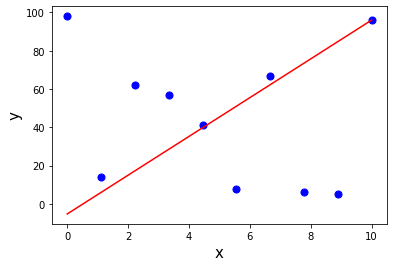

In [134]:
x = np.linspace(0, 10, 10, endpoint=True)
print(len(x))
y = np.random.randint(100, size=10)
print(len(y))

b = estimateCoefs(x, y)

print(b[0], b[1])

plotModel(x, y, b)

# Coeficiente de determinação

In [140]:
def R2(x, y):
  n = np.size(x)

  Xmean, Ymean = np.mean(x), np.mean(y)

  Sxx = 0
  Sxy = 0
  Syy = 0

  for i in range(n):
    Sxx = (x[i] - Xmean)**2
    Syy = (y[i] - Ymean)**2
    Sxy = (x[i] - Xmean) * (y[i] - Ymean)

  R2 = (Sxy**2) / (Sxx * Syy)

  return R2

R2 =  1.0
b_0 =  13.200000000000003 
b_1 =  8.08


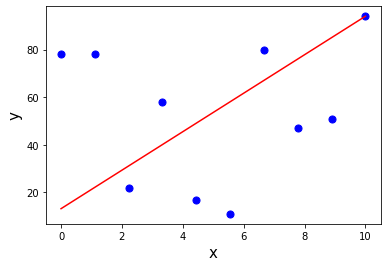

In [156]:
x = np.linspace(0, 10, 10, endpoint=True)
y = np.random.randint(100, size=10)

b = estimateCoefs(x, y)

print("R2 = ", R2(x, y))

print("b_0 = ", b[0], "\nb_1 = ", b[1])

plotModel(x, y, b)